# Task 5: Interpret the Significance of Promoter-Enhancer Predictions
## Overview of Goals:
1. **Transcription Factor Enrichment Analysis:** Exclude top transcription factors/outliers and focus on smaller genomic regions.  
> - [oPOSSUM 3.0](http://opossum.cisreg.ca/): Detection of over-represented conserved transcription factor binding sites and binding site combinations in sets of genes or sequences.  
> - Foreground: Homogeneous set of 20-100 genes/regions.  
> - Background: All genes in the human genome or a distinct subset of biological relevance.  

Foreground|Background
:---:|:---:
Subject genes|Non-subject genes
Escapee genes|Subject genes

2. **Enhancer-Promoter Evidence Analysis:** 
> - Zones of Analysis (2): ACE2-spanning TAD (chrX:15,200,000-15,800,000) and ACE2-linked enhancer boundaries (chrX:15,331,879-15,701,302)  
> - Promoter Regions (2): Evidence for two promoters averaged at **chrX:15,600,921-15,601,229** and **chrX:15,602,145-15,602,204**.  
> - Transcription Start Sites (TSSs): Evidence for two TSSs averaged at **chrX:15,600,982-15,600,997** and **chrX:15,602,151-15,602,158**.  

Putative Promoter|Coordinates|Source
:---:|:---:|:---:
1|chrX:15600911-15601448|NCBI
1|chrX:15600911-15601092|NCBI
1|chrX:15600912-15601365|NCBI
1|chrX:15600950-15601009|EDPnew
2|chrX:15602145-15602204|EDPnew

Putative TSSs|Coordinates|Source
:---:|:---:|:---:
1|chrX:15600937-15600950|NCBI, FANTOM5, refTSS
1|chrX:15600953-15600966|NCBI, FANTOM5, refTSS
1|chrX:15601077-15601112|refTSS
1|chrX:15600960-15600960|Ensembl Biomart
2|chrX:15602150-15602171|NCBI, FANTOM5, refTSS
2|chrX:15602148-15602148|Ensembl Biomart
2|chrX:15602155-15602155|EDPnew

> - Labelling Enhancer Data: Categorize enhancers according to evidence source/enhancer definition (e.g. RNA-expression based, ChIP-seq based, etc.) in an unweighted, "federated system."   
>> - Take a sliding window (200-500 bp) across the region and count the occurrence of: 1. data sources and 2. evidence.  
>> - Slide the window over half its length and do the same analysis for another "bin."  
>> - Repeat for the entire region.  
> - Plotting Conservation Data: 
> - Identifying TFs Associated With a Particular Biology (e.g. hormone receptors): Plot in a similar manner to #1.  



# Regulatory Element Prediction Methods:
**1. Experimental techniques:** Electrophoretic mobility shift assays (EMSA), molecular cloning with a reporter gene, mutation analyses, etc.  

> - Enhancer trap: Construct containing a transposable element, a reporter gene, and a genetic marker.  

**2. Evolutionary conservation data/orthology:** Sequence conservation of non-coding regions.    
**3. Proteins and chemical chromatin modifications:**  

> - **DNase-seq (DNase I hypersensitive sites sequencing):** Identification of accessible DNA regions in the genome (i.e. nucleosome-depleted, or open chromatin regions, which can contain cis-regulatory modules). Used to to map genome wide active cis-regulatory elements based on chromatin accessibility, including promoters, enhancers, silencers, insulators and locus control regions.  
> - **ChIP-seq (Chromatin immunoprecipitation followed by high throughput sequencing):** Identification of protein-interacting DNA regions (i.e. binding sites of DNA-associated proteins). Used to map the genome-wide in vivo location of transcription factors, chromatin regulators, and histone modifications, including phosphorylation, acetylation, and methylation.  
    
**4. Gene expression:**
> - **CAGE (Cap Analysis of Gene Expression):** Identification of promoters and TSSs, with independent cell-type-specific expression profiles.  

**5. Chromatin interactions:**  
> - **ChIA-PET:** Identification of de-novo long-range chromatin interactions genome-wide by combining Hi-C with ChIP-seq to detect all interactions mediated by a protein of interest.  
> - **Chromosome conformation capture (3C/4C/5C/Hi-C):** Identification of interactions between a pair of genomic loci  to analyze genome-wide chromatin organization, such as topologically associating domains (TADs).  

Category|Technique
:--:|:--:
Functional evidence|Reporter gene, site-directed mutagenisis
Chromatin state|DNase-seq, ATAC-seq, ChIP-seq, eCLIP-seq, RRBS, WGBS
Chromatin interaction|ChiA-PET, Hi-C
Gene expression|RNA-seq, RAMPAGE, CAGE
    
    
### Sources:
- [Genome-wide enhancer prediction from epigenetic signatures using genetic algorithm-optimized support vector machines](https://academic.oup.com/nar/article/40/10/e77/2411809)  
- [Enhancer (genetics)](https://en.wikipedia.org/wiki/Enhancer_(genetics))  


# Binning Data:
[A computational approach for the functional classification of the epigenome](https://epigeneticsandchromatin.biomedcentral.com/articles/10.1186/s13072-017-0131-7):   
- The genome is fully partitioned in non-overlapping segments of a fixed length and raw reads are assigned to segments (or bins) generating a count-based distribution for a given functional genomic assay.  
- The process is repeated for each epigenetic mark generating genome-wide normalized signals of multiple genomic tracks along the chromosomic coordinate.  
- Epigenetic signals are then processed through an unsupervised learning algorithm to infer the most probable chromatin state in each interval (i.e., a recurrent pattern of a given combination of marks) given a vector of observed frequencies or read count distributions.  

**Populating genomic bins:** 
### Using Excel:
- **General:**  
=COUNTIFS(All!$B$2:$B$1238,">"&'bin500'!C2,All!$C$2:$C$1238,"<"&'bin500'!D2)+COUNTIFS(All!$B$2:$B$1238,">"&'bin500'!C2,All!$C$2:$C$1238,">"&'bin500'!D2,All!$B$2:$B$1238,"<"&'bin500'!D2)+COUNTIFS(All!$B$2:$B$1238,"<"&'bin500'!C2,All!$C$2:$C$1238,"<"&'bin500'!D2,All!$C$2:$C$1238,">"&'bin500'!C2)+COUNTIFS(All!$B$2:$B$1238,"<"&'bin500'!C2,All!$C$2:$C$1238,">"&'bin500'!D2)  

- **Gene-related:**    
=COUNTIFS(All!$B$2:$B$1238,">"&'bin500'!C2,All!$C$2:$C$1238,"<"&'bin500'!D2,All!$F$2:$F$1238,"Y")+COUNTIFS(All!$B$2:$B$1238,">"&'bin500'!C2,All!$C$2:$C$1238,">"&'bin500'!D2,All!$B$2:$B$1238,"<"&'bin500'!D2,All!$F$2:$F$1238,"Y")+COUNTIFS(All!$B$2:$B$1238,"<"&'bin500'!C2,All!$C$2:$C$1238,"<"&'bin500'!D2,All!$C$2:$C$1238,">"&'bin500'!C2,All!$F$2:$F$1238,"Y")+COUNTIFS(All!$B$2:$B$1238,"<"&'bin500'!C2,All!$C$2:$C$1238,">"&'bin500'!D2,All!$F$2:$F$1238,"Y")  

- **Source:**    
=COUNTIFS(All!$B$2:$B$1238,">"&'bin500'!$C2,All!$C$2:$C$1238,"<"&'bin500'!$D2,All!$D$2:$D$1238,G$1)+COUNTIFS(All!$B$2:$B$1238,">"&'bin500'!$C2,All!$C$2:$C$1238,">"&'bin500'!$D2,All!$B$2:$B$1238,"<"&'bin500'!$D2,All!$D$2:$D$1238,G$1)+COUNTIFS(All!$B$2:$B$1238,"<"&'bin500'!$C2,All!$C$2:$C$1238,"<"&'bin500'!$D2,All!$C$2:$C$1238,">"&'bin500'!$C2,All!$D$2:$D$1238,G$1)+COUNTIFS(All!$B$2:$B$1238,"<"&'bin500'!$C2,All!$C$2:$C$1238,">"&'bin500'!$D2,All!$D$2:$D$1238,G$1)  

- **Evidence:**  
=COUNTIFS(All!$B$2:$B$1238,">"&'bin500'!$C2,All!$C$2:$C$1238,"<"&'bin500'!$D2,All!$G$2:$G$1238,O$1)+COUNTIFS(All!$B$2:$B$1238,">"&'bin500'!$C2,All!$C$2:$C$1238,">"&'bin500'!$D2,All!$B$2:$B$1238,"<"&'bin500'!$D2,All!$G$2:$G$1238,O$1)+COUNTIFS(All!$B$2:$B$1238,"<"&'bin500'!$C2,All!$C$2:$C$1238,"<"&'bin500'!$D2,All!$C$2:$C$1238,">"&'bin500'!$C2,All!$G$2:$G$1238,O$1)+COUNTIFS(All!$B$2:$B$1238,"<"&'bin500'!$C2,All!$C$2:$C$1238,">"&'bin500'!$D2,All!$G$2:$G$1238,O$1)  

- **Category:**  
=COUNTIFS(All!$B$2:$B$1238,">"&'bin500'!$C2,All!$C$2:$C$1238,"<"&'bin500'!$D2,All!$H$2:$H$1238,Q$1)+COUNTIFS(All!$B$2:$B$1238,">"&'bin500'!$C2,All!$C$2:$C$1238,">"&'bin500'!$D2,All!$B$2:$B$1238,"<"&'bin500'!$D2,All!$H$2:$H$1238,Q$1)+COUNTIFS(All!$B$2:$B$1238,"<"&'bin500'!$C2,All!$C$2:$C$1238,"<"&'bin500'!$D2,All!$C$2:$C$1238,">"&'bin500'!$C2,All!$H$2:$H$1238,Q$1)+COUNTIFS(All!$B$2:$B$1238,"<"&'bin500'!$C2,All!$C$2:$C$1238,">"&'bin500'!$D2,All!$H$2:$H$1238,Q$1)



=IF(OR(AND(B2>'bin500'!$C$2:$C$2400,C2<'bin500'!$D$2:$D$2400),AND(B2>'bin500'!$C$2:$C$2400,C2>'bin500'!$D$2:$D$2400,B2<'bin500'!$D$2:$D$2400),AND(B2<'bin500'!$C$2:$C$2400,C2<'bin500'!$D$2:$D$2400,C2>'bin500'!$C$2:$C$2400),AND(B2>'bin500'!$C$2:$C$2400,C2>'bin500'!$D$2:$D$2400)),'bin500'!$B$2:$B$2400)


# Data Sources:

Database|Region (chrX:15,200,000-15,800,000)|Gene (ACE2)|cCREs|Evidence|Category|Techniques
:--:|:--:|:--:|:--:|:--:|:---:|:---:
ENCODE (SCREEN cCREs)|Y|Y|PLS, pELS, dELS, DNase-H3K4me3, CTCF-bound, CTCF-only|Epigenomic|Chromatin State|DNase-seq, ChIP-seq
Ensembl (Regulatory Build)|Y|**There are no TarBase features linked to this gene (i.e. there is no whole blood GTEX eQLTLs data for this region)**|Promoters, Promoter flanking regions, Enhancers, CTCF binding sites, Transcription factor binding sites, Open chromatin regions|Epigenomic|Chromatin State|DNase-seq, ChIP-seq
EpiRegio|Y|Y|Repressors, activators|Epigenomic|Chromatin State, Gene Expression|DNase1-seq, RNA-seq
PSYCHIC||Y|-|Epigenomic|Chromatin Interaction|Hi-C
NCBI||Y|Promoter, Conserved region, Protein bind, Transcriptional cis-regulatory region, Enhancer|Functional||protein-binding evidence, reporter gene assay, site-directed mutagenisis, sequence similarity
GeneHancer|NA|Y|
FANTOM5|Y|Y|Enhancers, TSSs|Epigenomic|Expression|CAGE, RNA-seq
EDPnew|Y|Y|Promoters|Epigenomic|Expression|CAGE, RAMPAGE

# Plots:
    1. Comparing whole-TAD vs. ACE2-linked regulatory elements (facetwrap ~ database)
    

500 bp bin|250 bp bin
:---:|:---:
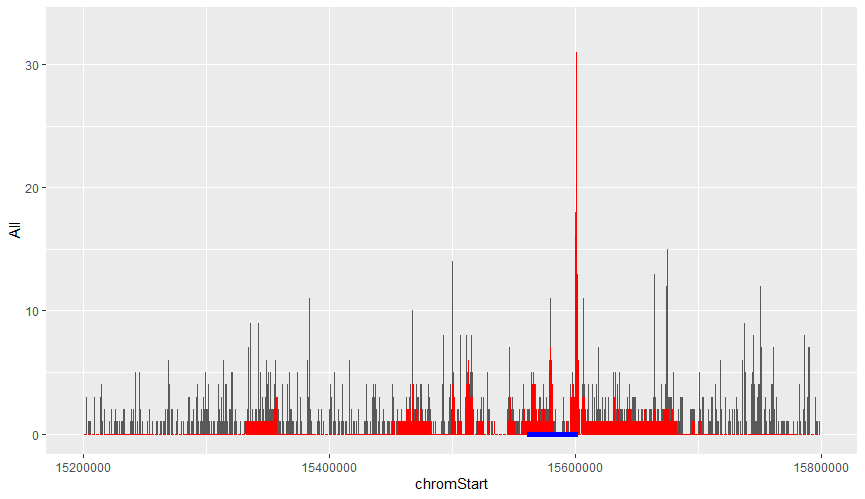|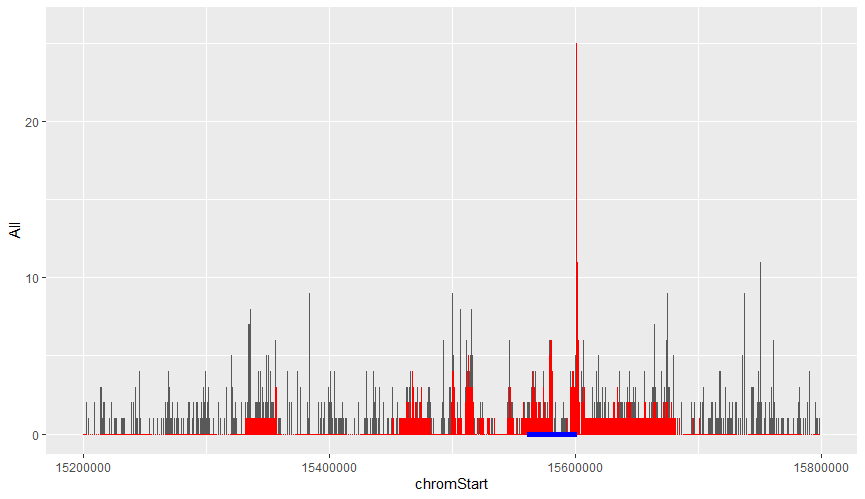

**This scale is off.**  
**For 500 bp bins, ACE2 is located between bins 1426-1609.**  

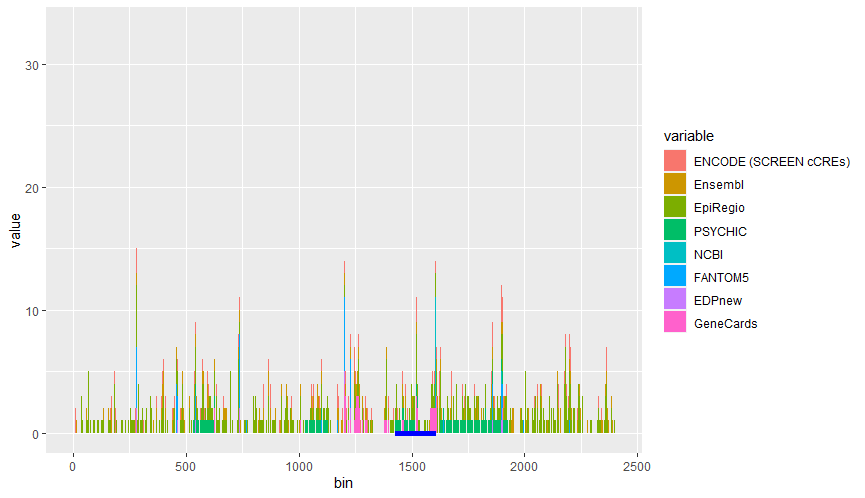
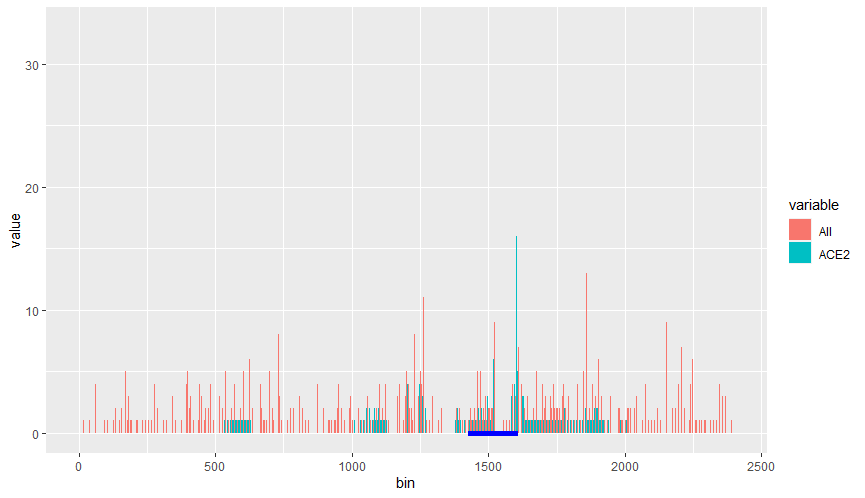
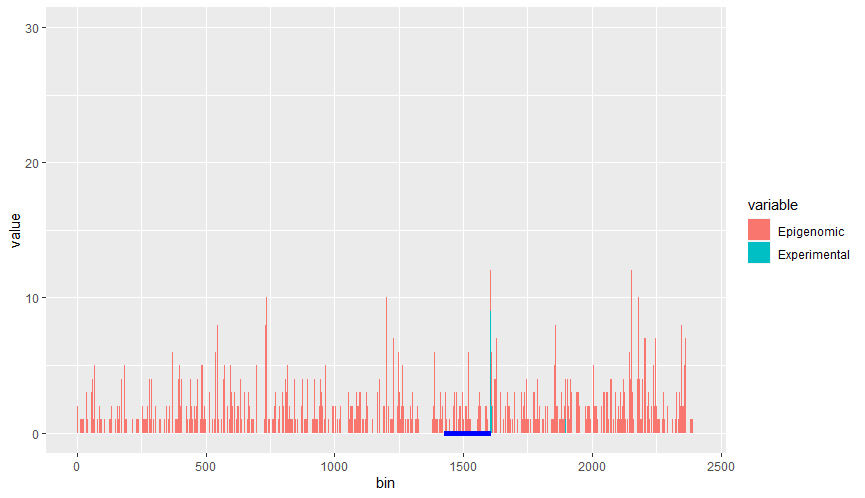
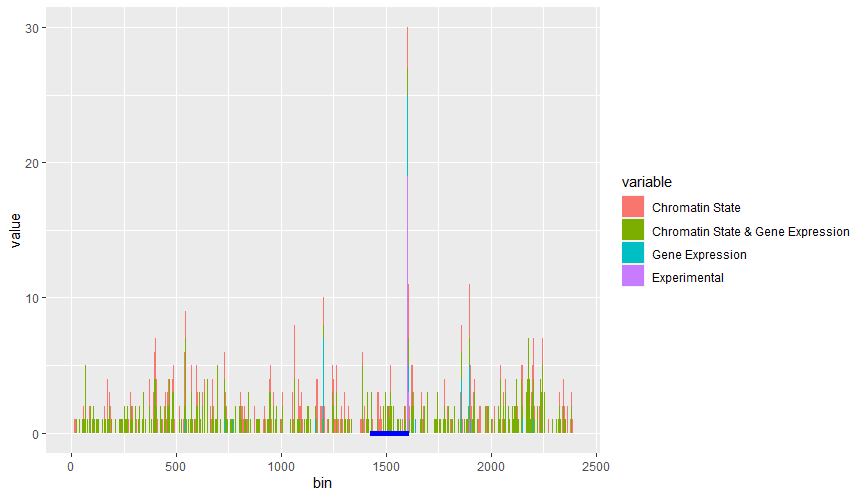

**This scale is still off.**

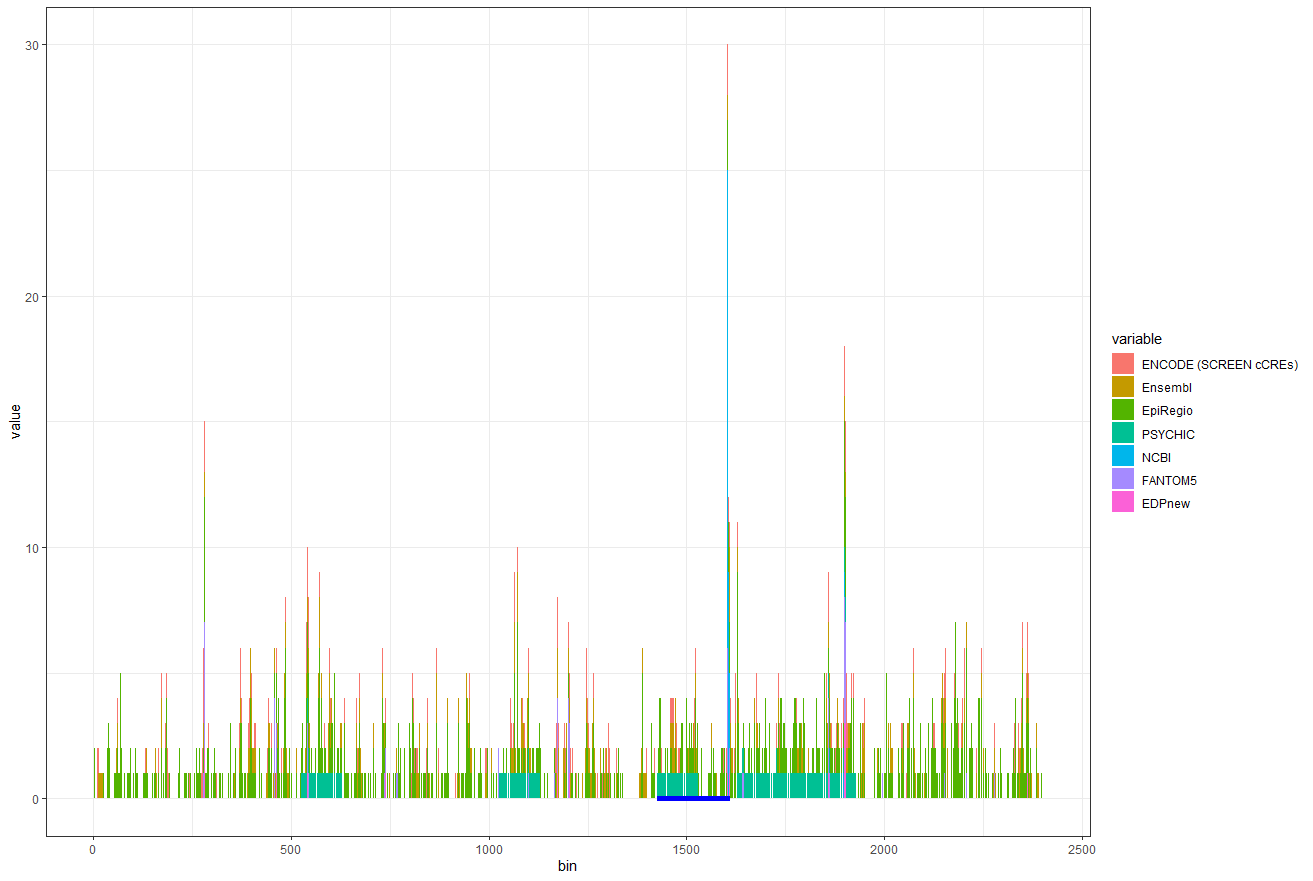
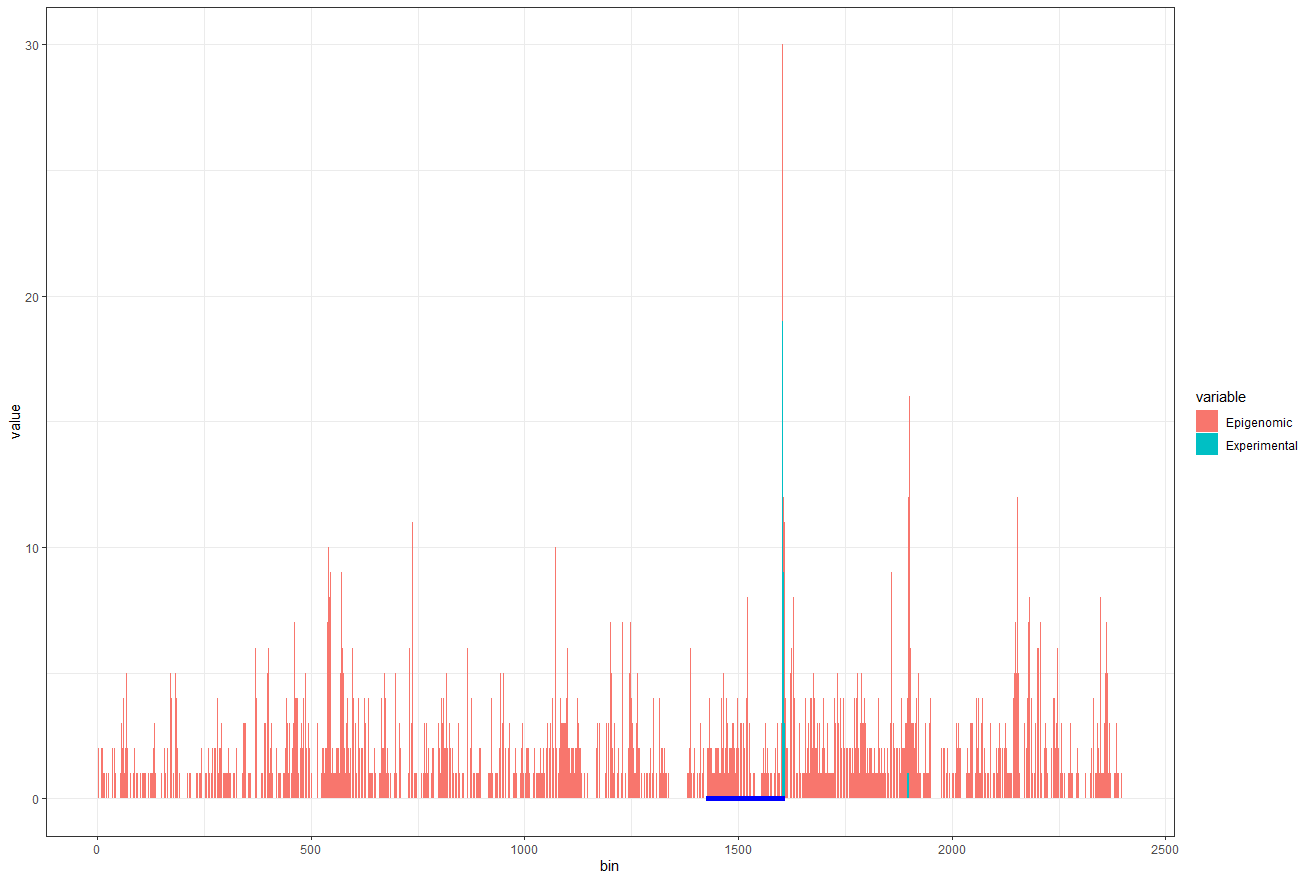
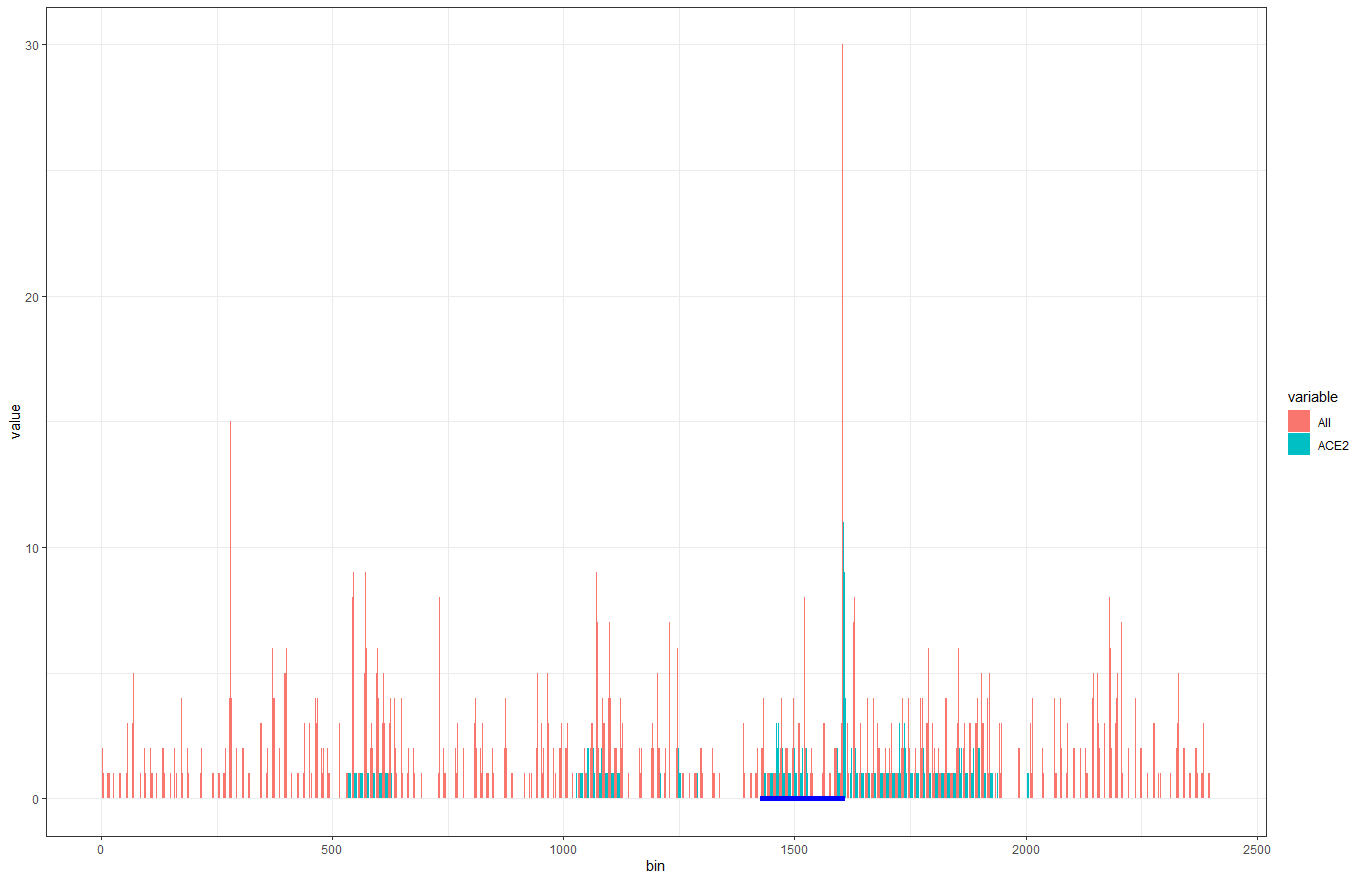
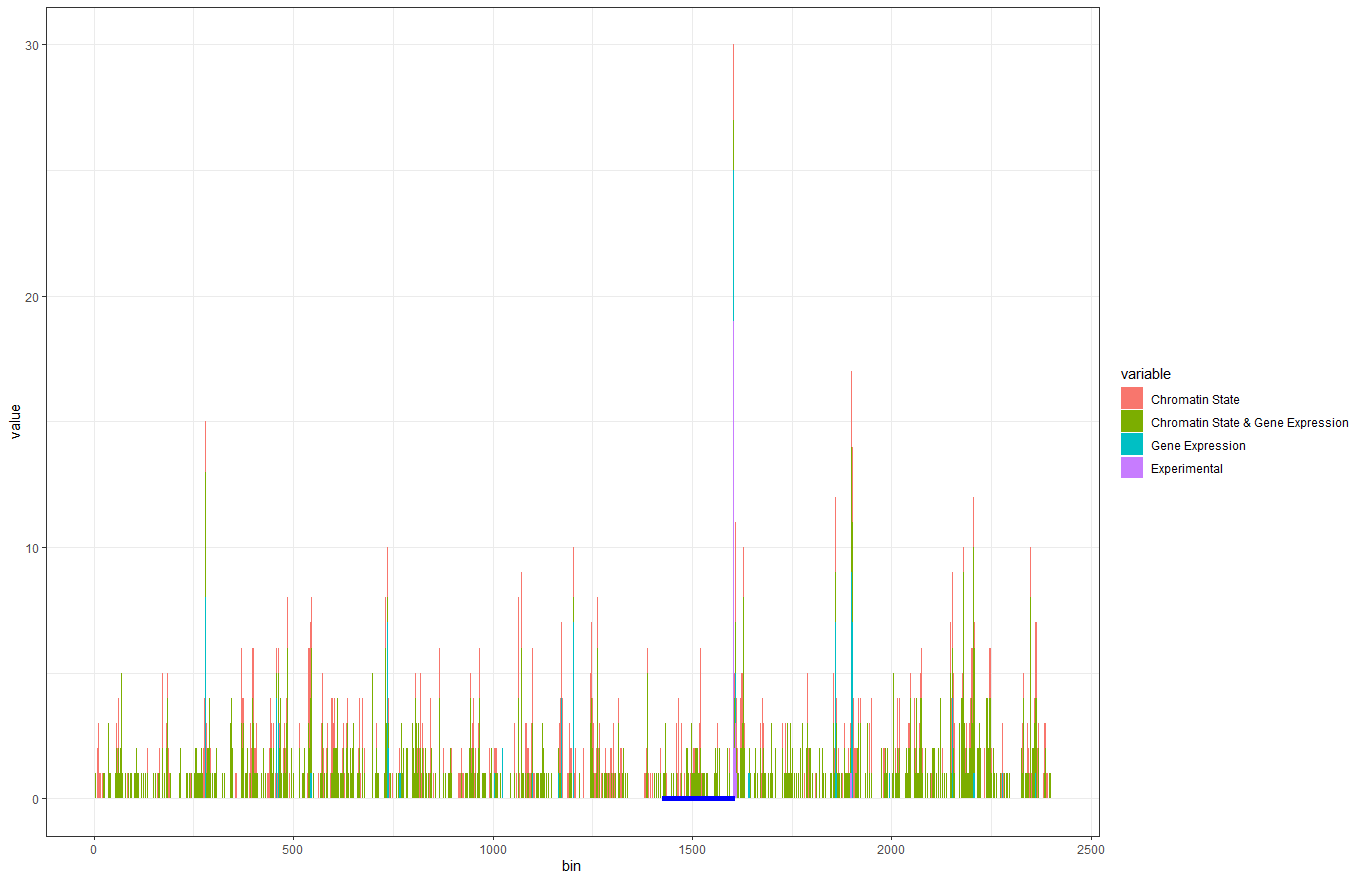

Image dimensions to match UCSC tracks:  

Width|Height
:--:|:--:
1759|80

# Regulators of ACE2 Expression:
- Tissue‐specific regulation of ACE2, AT1 receptor, and AT2 receptor genes by 17β‐[oestradiol](https://physoc-onlinelibrary-wiley-com.ezproxy.library.ubc.ca/doi/full/10.1113/expphysiol.2007.041806) in kidneys but not in lungs.  
> - [Transcriptional Activation of Genes by 17 Beta-Estradiol Through Estrogen receptor-Sp1 Interactions](https://pubmed.ncbi.nlm.nih.gov/11345900/): 
- The transcription factor hypoxia-inducible factor 1α [(HIF-1α)](https://journals-physiology-org.ezproxy.library.ubc.ca/doi/full/10.1152/ajplung.90415.2008) inhibits ACE2 expression in lungs.  
- ACE2 mRNA is downregulated by ANG II and endothelin-1 (ET-1) in [cardiac myocytes and fibroblasts](https://journals-physiology-org.ezproxy.library.ubc.ca/doi/full/10.1152/ajpheart.00426.2008). AT1 receptor blockers (ARBs), atrial natriuretic peptide (ANP), and inhibitors of mitogen-activated protein kinase kinase 1 block the reduction in ACE2 mRNA by ANG II or ET-1.  
- The [sirtuin 6 {SIRT6)](https://oce-ovid-com.ezproxy.library.ubc.ca/article/00004872-201810003-00287/HTML) regulates ACE2 expression in HCFs.  
> [SIRT6](https://www.sciencedirect.com/topics/biochemistry-genetics-and-molecular-biology/sirt6): SIRT6 functions as a corepressor of the transcription factors NF-κB and Hif1α.  
- [Estrogen](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5544171/?tool=pmcentrez&report=abstract) increases the levels of  ACE2, AT2R, and MAS expression.  
- [OIP5-AS1](https://www-sciencedirect-com.ezproxy.library.ubc.ca/science/article/pii/S1878875020305325) regulates miR-200b/ACE2.  
- [Histone H3 acetylation (H3-Ac)](https://www-sciencedirect-com.ezproxy.library.ubc.ca/science/article/pii/S0006295214006947?via%3Dihub) on ACE2 promoter region in heart of HCD **rabbits** increases ACE2 expression.  
- Blockade of [ERK1/2 or p38 MAP kinases](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2329828/?tool=pmcentrez&report=abstract) by either specific inhibitors or a dominant-negative adenovirus was able to abolish Ang II-induced ACE2 down-regulation in human kidney tubular cells.  
> [p38 mitogen-activated protein kinases](https://en.wikipedia.org/wiki/P38_mitogen-activated_protein_kinases)  
- The elevated activity of [ADAM17](https://link-springer-com.ezproxy.library.ubc.ca/article/10.1007/s10571-018-0591-8), a member of the ‘A Disintegrin And Metalloprotease’ (ADAM) family, was found to contribute to this glutamate-induced ACE2 down-regulation.  
- [TFBS analysis](https://www.biorxiv.org/content/10.1101/2020.04.13.038752v1.full) of the ACE2 intestinal transcript promoter (ENST00000252519) revealed several candidate binding sites: CDX2, HNF1A, FOXA1, SOX4, TP63, HNF4A, DUX4, FOXA2, NR2F6, and SOX11. These predicted sites overlap an evolutionarily conserved region in mammals and are proximal to several ATAC-Seq peaks.

Interesting genes/TFs to investigate further: **ESR1**, **HIF1A**, AT1R, AT2R, EDN1, SIRT6, OIP5-AS1, MIR200B, MAPK/ERK/SAPK/RK/CSBP/MAPKAP2/ATF2/Mac/**MEF2**/TTP/**NF-κB**, ADAM17

From [Cistrome Data Browser](http://cistrome.org/db/#/):  

**chrX:15,200,000-15,800,000**  
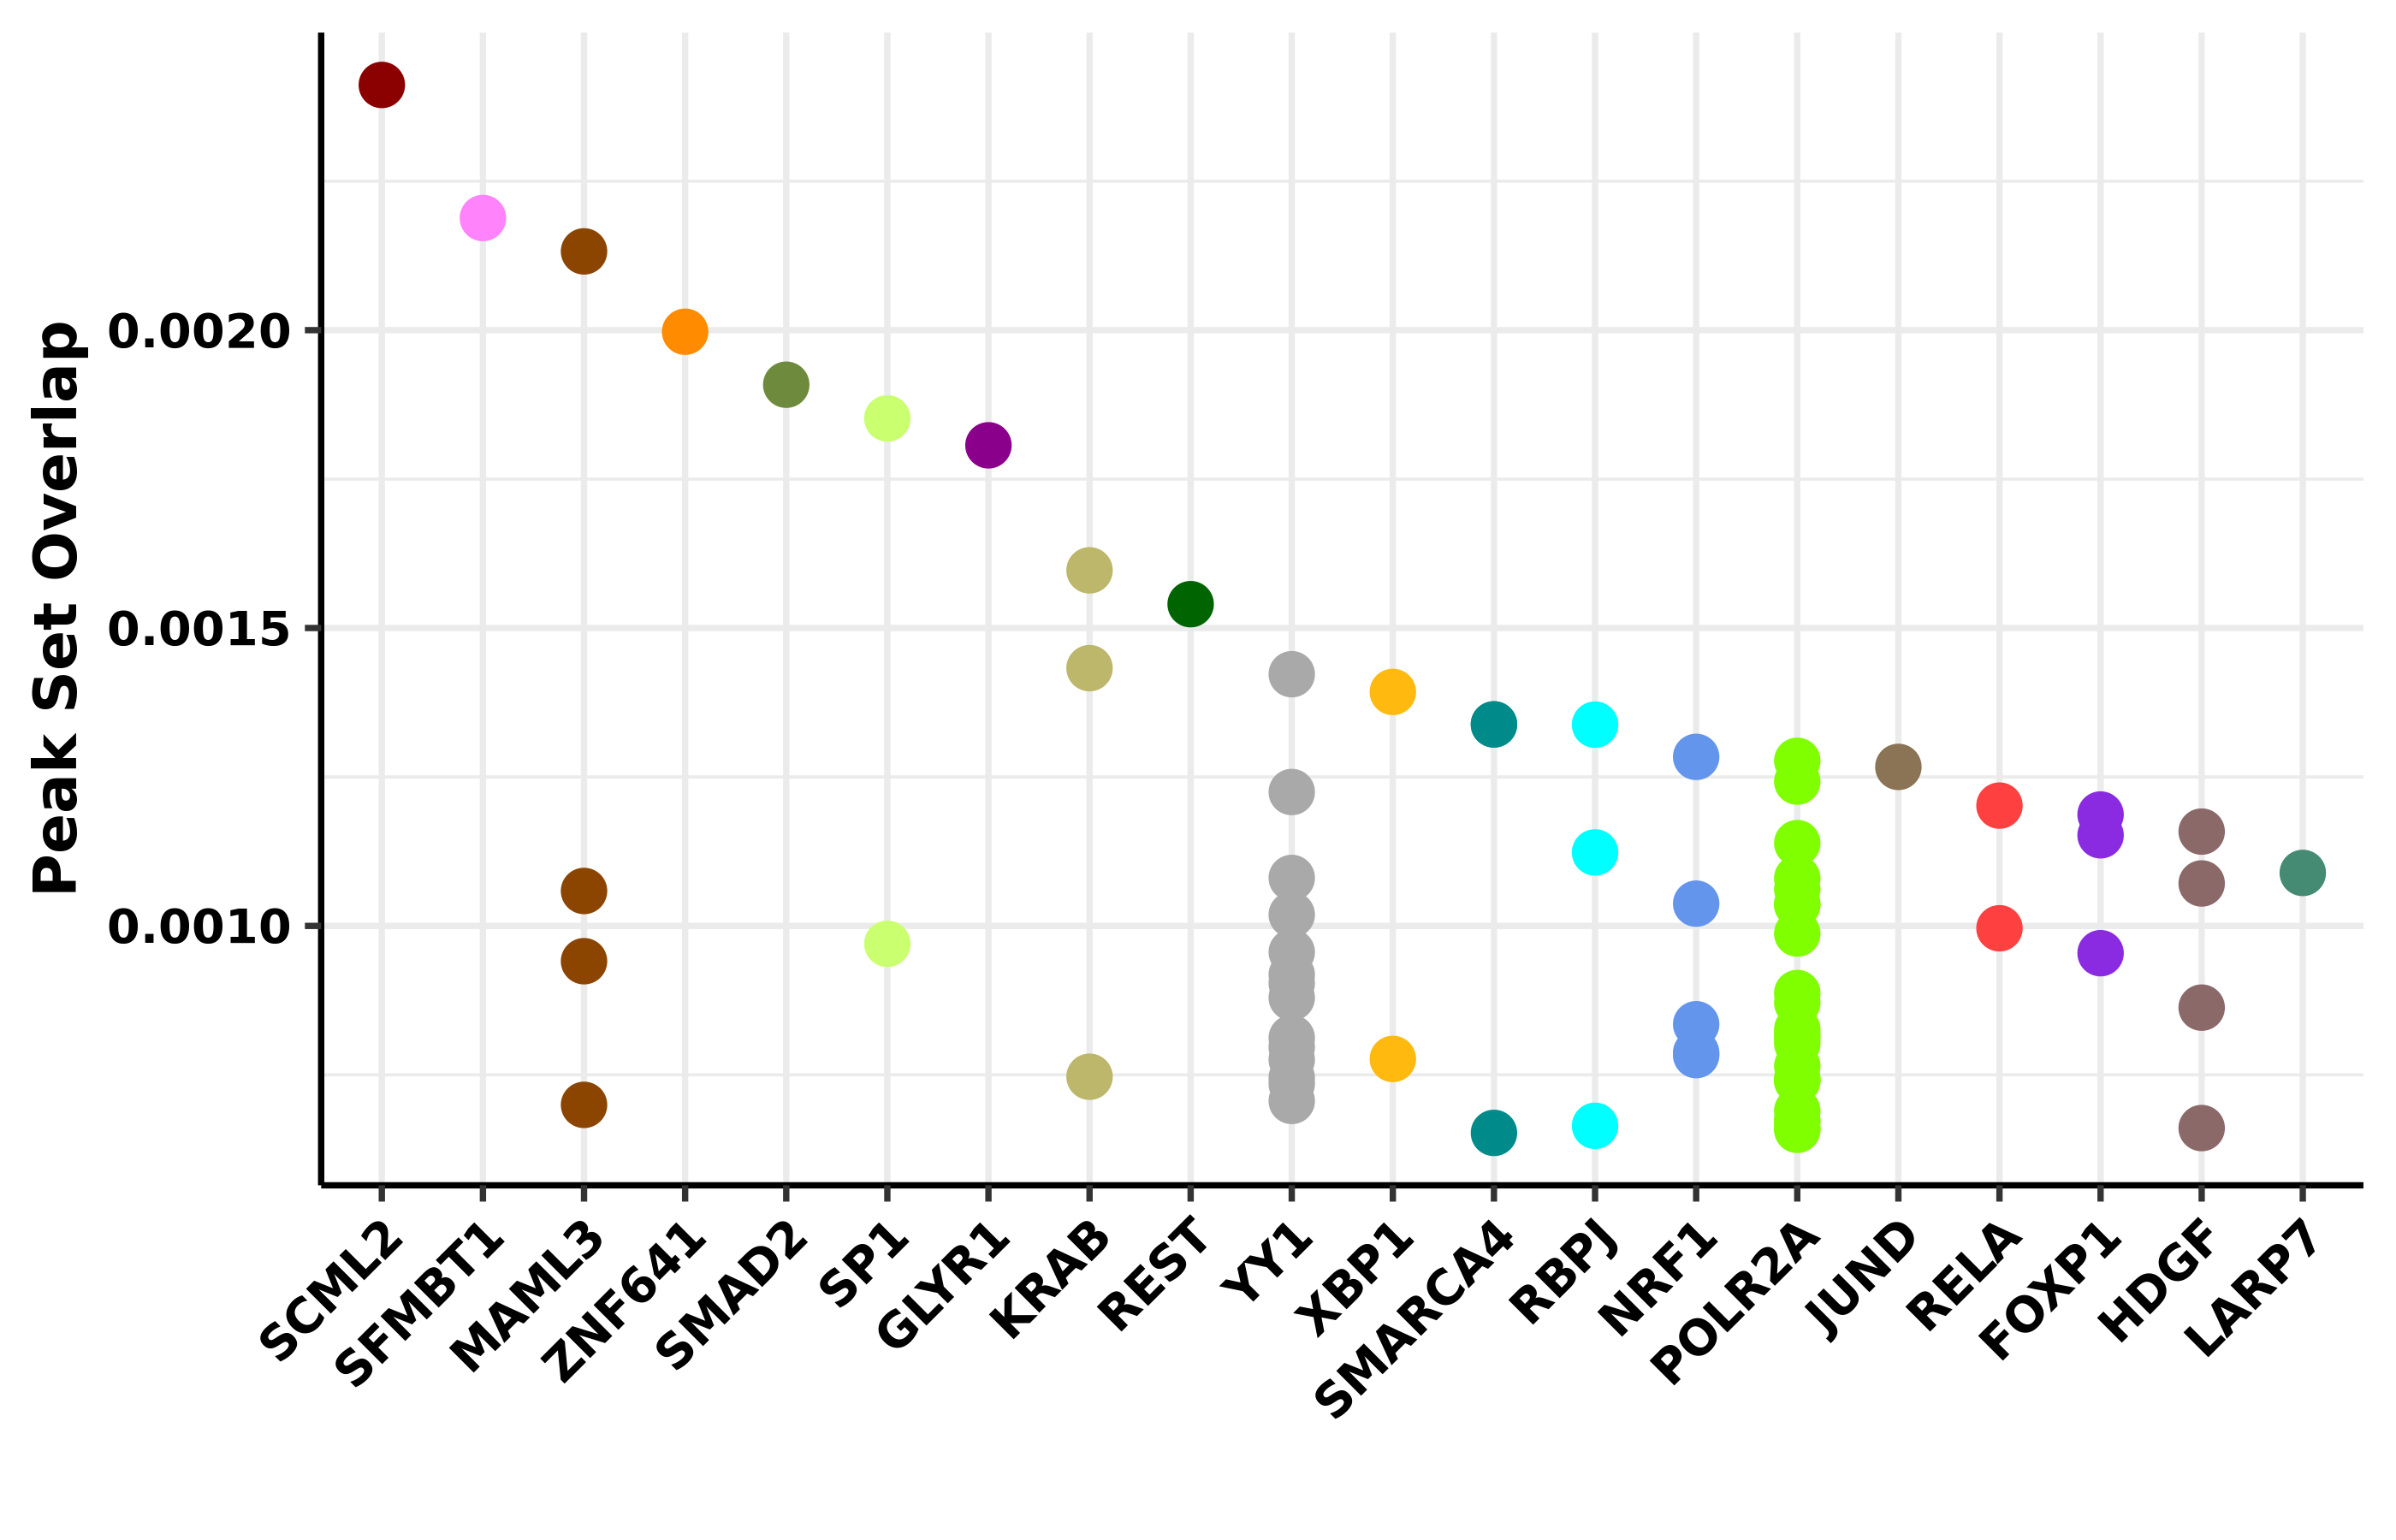

**ACE2**  
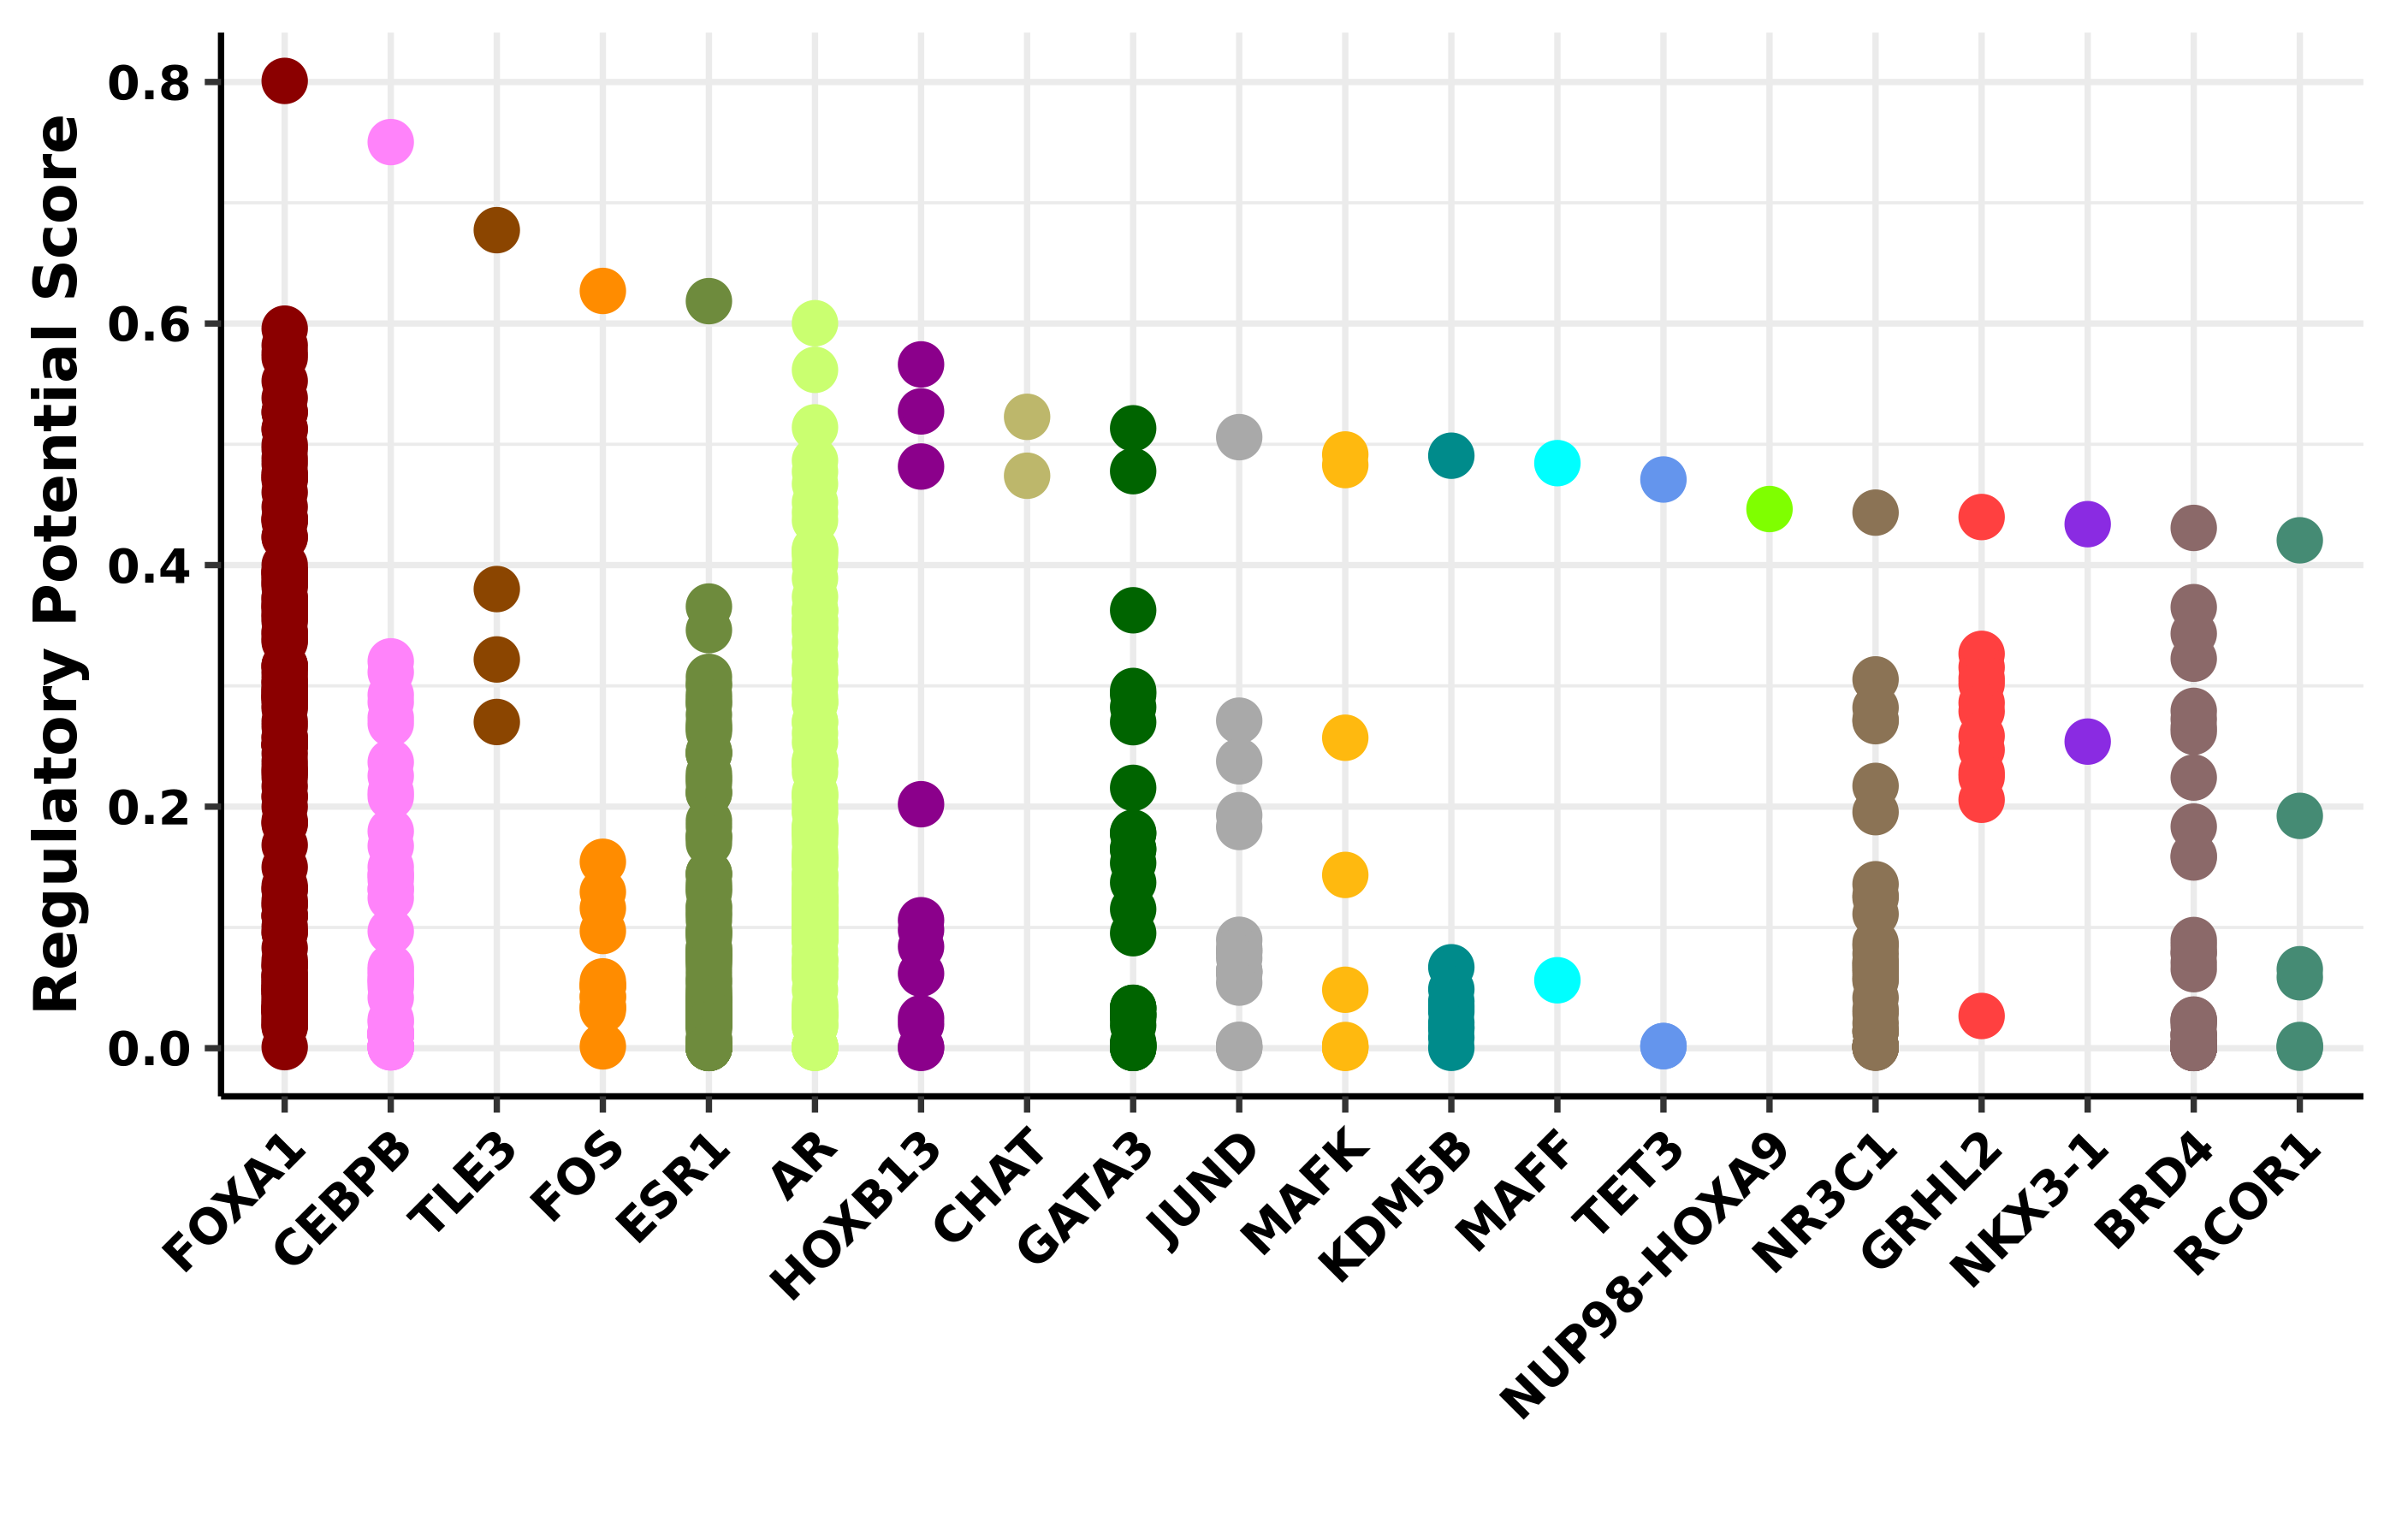

- FOXA1 is involved in ESR1-mediated transcription;
- CEBPB is involved in the signaling pathways mediated by p38-alpha and p38-beta; 